## Black Friday EDA and Feature engineering

### Problem Statement

A retail company "ABC Pvt Ltd" wants to understand the customer purchase behaviour (specifically, purchase amount) against various product categories. They have shared purchase summary of various products of different categories. They shared purchase summary of various customer for selected high volume products from last month. The dataset also contains customer demographics (age, gender, marital_status, city_type, stay_in_current_city), product details (product_id and product category) and total purchase_amount from last month

Now, they want to build a model to predict the purchase amount of customer against products which will help them to create personalized offer for customers against different products.

dataset: https://www.kaggle.com/datasets/sdolezel/black-friday?resource=download&select=train.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [3]:
df = pd.concat([df_test,df_train])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [5]:
df.drop(['User_ID'], axis=1, inplace=True)

In [6]:
df.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### Handling Categorical Feature

In [7]:
# Handling Categorical feature Gender
df['Gender']=df['Gender'].map({'F':0,'M':1})
# df['Gender'] = pd.get_dummies(df['Gender'], drop_first=True)

In [8]:
# Handling Categorical feature Age
df['Age'].unique()

array(['46-50', '26-35', '36-45', '18-25', '51-55', '55+', '0-17'],
      dtype=object)

In [9]:
# Target Guiding
df['Age']=df['Age'].map({'0-17':1,'18-25':2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7})

In [10]:
# Handling Categorical feature City
df_city = pd.get_dummies(df['City_Category'], drop_first=True)
df_city.head()

,B,C
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [11]:
df = pd.concat([df, df_city], axis=1)
df.drop(['City_Category'], axis=1, inplace=True)

In [12]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,2,1,1,11.0,NaN,NaN,1,0
1,P00113442,1,3,17,0,0,3,5.0,NaN,NaN,0,1
2,P00288442,0,4,1,4+,1,5,14.0,NaN,NaN,1,0
3,P00145342,0,4,1,4+,1,4,9.0,NaN,NaN,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [13]:
# Missing values
df.isna().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [14]:
df['Product_Category_2'].unique()

array([11.,  5., 14.,  9.,  3.,  4., 13.,  2., nan,  8., 15., 17., 12.,
       16.,  6., 10., 18.,  7.])

In [15]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [16]:
df['Product_Category_2'].mode()[0]

8.0

In [17]:
# Replace missing values for categorical feature with mode
df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0], inplace=True)
df['Product_Category_2'].isnull().sum()

0

In [18]:
# Replace missing values for Product_Category_3 with mode
df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0], inplace=True)
df['Product_Category_3'].isnull().sum()

0

In [19]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [20]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

<ipython-input-20-7d6a3c4db74c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [21]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,1,0
3,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [23]:
# Convert object dtype to int dtype
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


C:\Users\syedr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

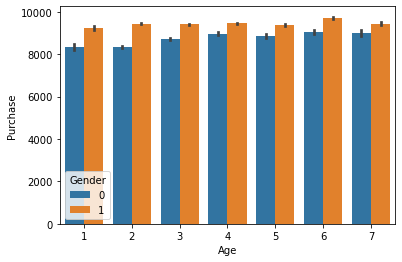

In [25]:
# Visualization of Age vs Purchase
sns.barplot('Age','Purchase',hue='Gender', data=df)

#### Purchases made by Men is higher than Women accross all age groups

C:\Users\syedr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

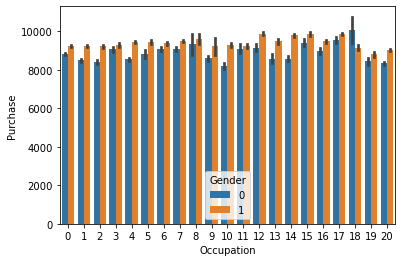

In [26]:
sns.barplot('Occupation','Purchase',hue='Gender', data=df)

C:\Users\syedr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

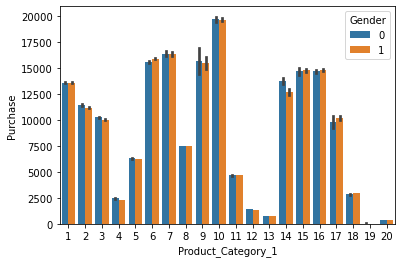

In [27]:
sns.barplot('Product_Category_1','Purchase',hue='Gender', data=df)

C:\Users\syedr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

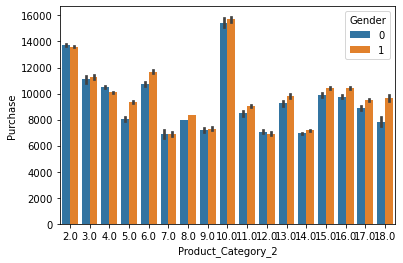

In [28]:
sns.barplot('Product_Category_2','Purchase',hue='Gender', data=df)

C:\Users\syedr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

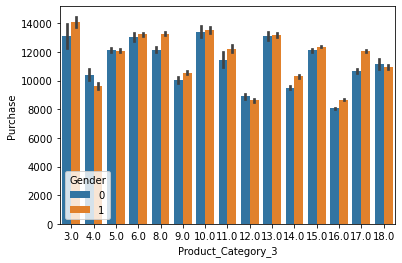

In [29]:
sns.barplot('Product_Category_3','Purchase',hue='Gender', data=df)

#### Product Category has been sold the most with purchase volume reaching almost 20000